In [1]:
#ignoring the warnings since tensor flow will give  a lot of them
import warnings
warnings.filterwarnings("ignore")

# Import required Libraries
import tensorflow as tensorflow

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image

In [4]:
# Loading the dataset
import matplotlib.pyplot as plt
import numpy as np
import os # To create paths and itreate through directories
import cv2 #image operations

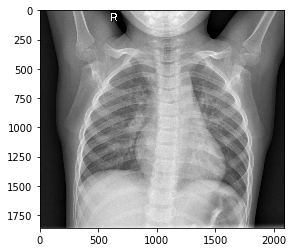

In [5]:
train_dir= "chest_xray/train"
test_dir= "chest_xray/test"
val_dir="chest_xray/val"

Categories=["NORMAL","PNEUMONIA"]

for i in Categories:
    path=os.path.join(train_dir,i) 
    for img in os.listdir(path):
        image_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        plt.imshow(image_array,cmap='gray')
        plt.show()
        break
    break          
    

In [6]:
print(image_array) # this is how the images are stored ie as 2d arrays

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


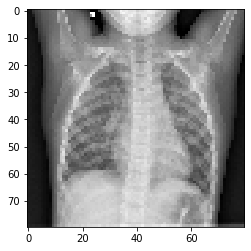

In [14]:
# select a size for the image

im_size=80

#create new array with all images of this size
new_array=cv2.resize(image_array,(im_size,im_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [15]:
# Now we create the training dataset

training_data=[]
testing_data=[]
val_data=[]

# create a function for this asnd copy paste the above commands
# the try catch block helps to prevent crashing of the code due to damaged files

def create_training():
    for i in Categories:
        path=os.path.join(train_dir,i) 
        class_num=Categories.index(i)
        
        for img in os.listdir(path):
            try:
                image_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
                new_array=cv2.resize(image_array,(im_size,im_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                print("image is broken")
                
create_training()


In [16]:
                
def create_testing():
    for i in Categories:
        path=os.path.join(test_dir,i) 
        class_num=Categories.index(i)
        
        for img in os.listdir(path):
            try:
                image_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
                new_array=cv2.resize(image_array,(im_size,im_size))
                testing_data.append([new_array,class_num])

            except Exception as e:
                print("image is broken")
                
create_testing()

In [17]:

                
def create_val():
    for i in Categories:
        path=os.path.join(val_dir,i) 
        class_num=Categories.index(i)
        
        for img in os.listdir(path):
            try:
                image_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
                new_array=cv2.resize(image_array,(im_size,im_size))
                val_data.append([new_array,class_num])

            except Exception as e:
                print("image is broken")
                
create_val()

In [23]:
# create x and y

x_train=[]
y_train=[]

for features,labels in training_data:
    x_train.append(features)
    y_train.append(labels)
    
# we need to make x as a numpy array 
import numpy as np
x_train=np.array(x_train).reshape(-1,im_size,im_size,1) 
# -1 indicates all values are taken(this is not explining shape)
# im_size to resize the array
# 1 to indicate grayscale if it was RBG, use 3 instead                 




In [24]:
x_test=[]
y_test=[]

for features,labels in testing_data:
    x_test.append(features)
    y_test.append(labels)
    
# we need to make x as a numpy array 
import numpy as np
x_test=np.array(x_test).reshape(-1,im_size,im_size,1) 
# -1 indicates all values are taken(this is not explining shape)
# im_size to resize the array
# 1 to indicate grayscale if it was RBG, use 3 instead  

In [25]:
x_val=[]
y_val=[]

for features,labels in val_data:
    x_val.append(features)
    y_val.append(labels)
    
# we need to make x as a numpy array 
import numpy as np
x_val=np.array(x_val).reshape(-1,im_size,im_size,1) 
# -1 indicates all values are taken(this is not explining shape)
# im_size to resize the array
# 1 to indicate grayscale if it was RBG, use 3 instead  

In [27]:
# Now we save x and y
# this can be done by to_csv or by pickleing

import pickle

pickle_out=open("x_train.pickle","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("x_test.pickle","wb")
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

pickle_out=open("x_val.pickle","wb")
pickle.dump(x_val,pickle_out)
pickle_out.close()

pickle_out=open("y_val.pickle","wb")
pickle.dump(y_val,pickle_out)
pickle_out.close()